# Telegram-channel "Monitor"

* `time` — time at which a message was sent
* `date` — date on which a message was sent
* `message` — content of the messages


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt   
from wordcloud import WordCloud
import re
from collections import Counter


# Loading & Preprocessing Data

In [2]:
# df = pd.read_csv('preprocessed_tg.csv')
df = pd.read_csv('..\clean_data\preprocessed_tg.csv')

In [3]:
df.head(10)

,time,date,message
0,23:40:45,2023-01-25,ще декілька бпла на лінії фронту у запорізькій...
1,23:23:13,2023-01-25,збиваються цілі на півдні про кожну не пишемо
2,23:09:57,2023-01-25,дніпро робота ппо
3,22:58:42,2023-01-25,загрози ту22м3 на даний момент немає тільки бпла
4,22:41:15,2023-01-25,є збиття бпла по півдню
5,22:32:30,2023-01-25,напрямок ракет на черкащину полтавщину
6,22:31:37,2023-01-25,вибухи у дніпрі
7,22:10:01,2023-01-25,особлива увага дніпру та запоріжжю повідомити ...
8,22:07:07,2023-01-25,є повідомлення про наявність 3х ту22м3 біля сх...
9,22:01:43,2023-01-25,не всі бпла видно з огляду на їх розмір тому п...


In [4]:
df.shape

(4878, 3)

In [5]:
df.dtypes

time       object
date       object
message    object
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df.dtypes

time       datetime64[ns]
date       datetime64[ns]
message            object
dtype: object

In [8]:
df.isnull().sum()

time       0
date       0
message    0
dtype: int64

# Visualization

## Time Series Plot of Messages Over Time

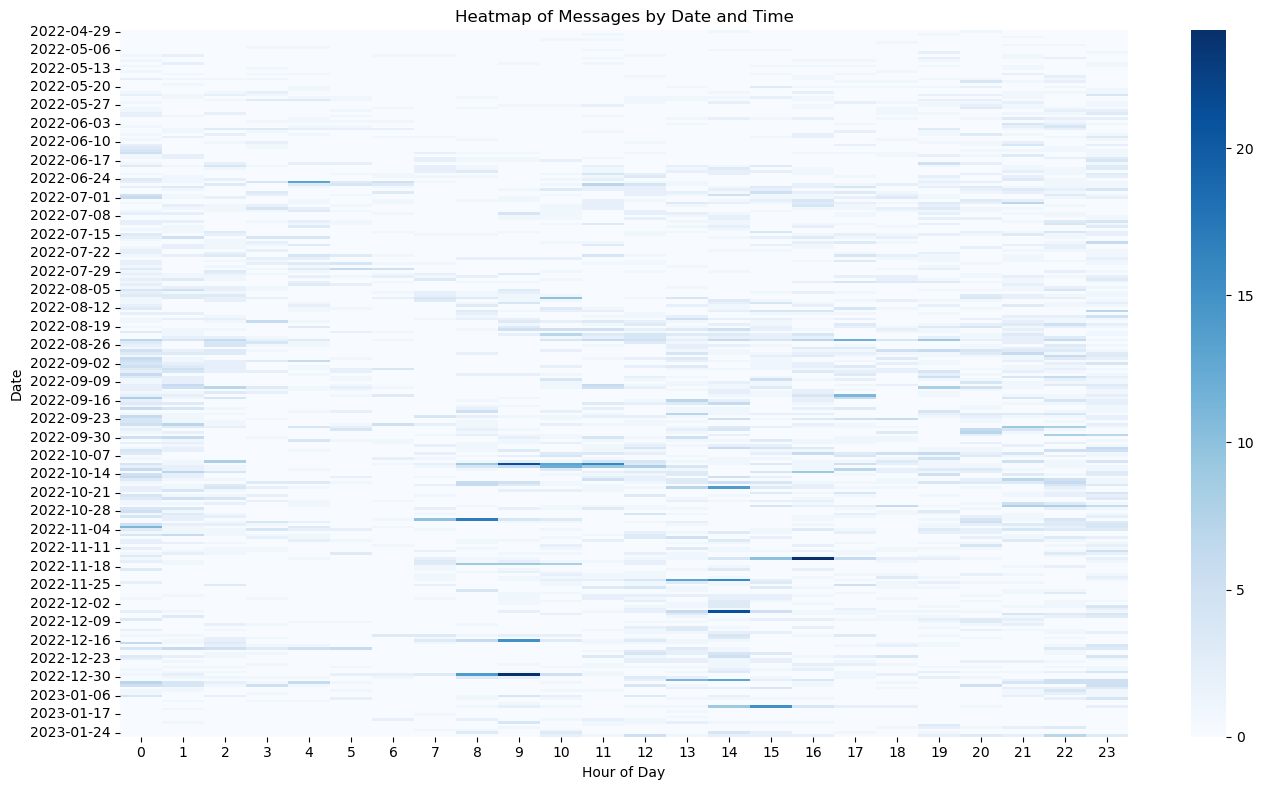

In [9]:
df['date'] = df['date'].dt.date
df['hour'] = df['time'].dt.hour

messages_by_date_time = df.groupby(['date', 'hour']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(messages_by_date_time, cmap='Blues')
plt.title('Heatmap of Messages by Date and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

### The graphic above gives a general overview of the number of messages during the whole given period of time.

## Message Count by Date

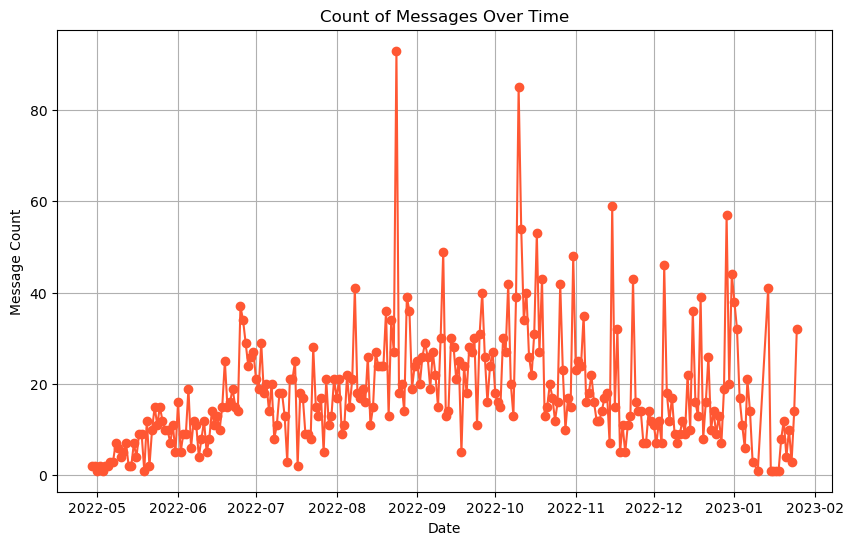

In [10]:
df['date'] = pd.to_datetime(df['date'])

message_count_by_date = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(10, 6))
message_count_by_date.plot(kind='line', marker='o', color='#FF5733')
plt.title('Count of Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.grid(True)
plt.show()

### This plot provides a more detailed overview of the daily number of messages.
### Let's take a look at the day with the biggest amount of messages.

In [11]:
max_messages_date = message_count_by_date.idxmax()
max_messages_count = message_count_by_date.max()

print("Date with the highest number of messages:", max_messages_date)
print("Number of messages on that date:", max_messages_count)

Date with the highest number of messages: 2022-08-24
Number of messages on that date: 93


In [12]:
messages_on_max_messages_date = df[df['date'].dt.date == max_messages_date]

messages = messages_on_max_messages_date['message'].tolist()

for message in messages:
    print(message)

чаплине – наш біль сьогодні станом на цю хвилину – 22 загиблих з них п'ятеро згоріли в машині загинув підліток йому було 11 років російська ракета зруйнувала його будинок пошуковорятувальні роботи на залізничній станції тривають володимир зеленський
авіація рухається у зворотньому напрямку була імітація пусків
напрямок затока чорноморськ
пуски ракет стратегічною авіацією
харків під обстрілом рсзв
у чорному морі стратегічна авіація ворога два ту22м3 можливі ракетні удари перебувайте в укриттях
імовірність запуску ракет із акваторії чорного моря
у дніпропетровській області рф завдала ракетного удару по залізничній станції чапліне загинули 15 людей ще близько 50 отримали поранення заявив зеленський під час виступу перед радбезом оон чотири пасажирські вагони горять станом на даний момент вбито щонайменше 15 людей близько 50 поранено рятувальники працюють але на жаль кількість загиблих ще може збільшитися ось так росія підготувалася до цього засідання ради безпеки оон – розповів зеленський

### It can be concluded that the large amount of messages is due to a huge shelling on Independence Day.

## Message Count for each Month of the Dataset

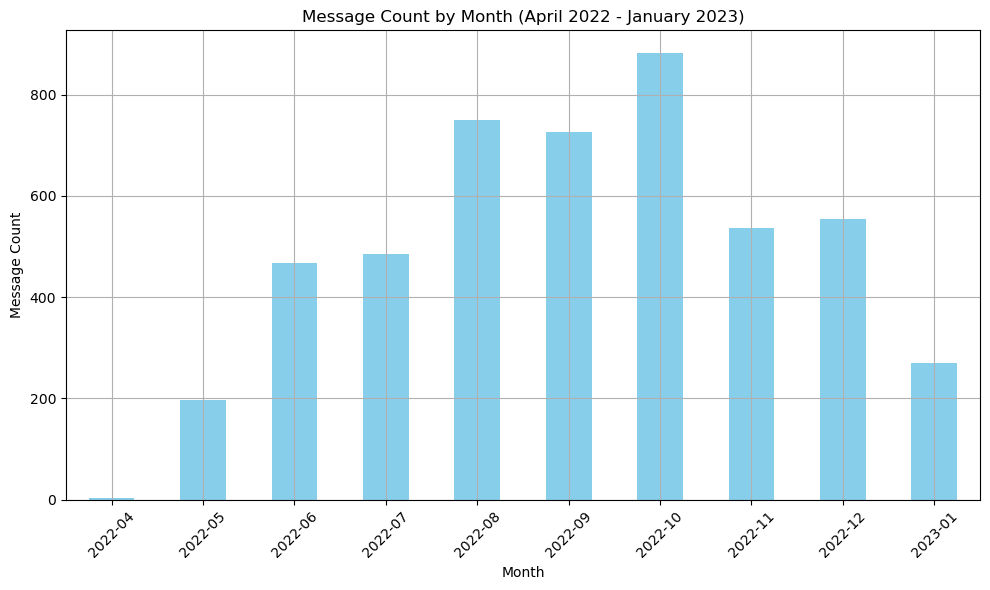

In [13]:
start_date = '2022-04-01'
end_date = '2023-01-31'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

message_count_by_month = df_filtered.groupby(df_filtered['date'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
message_count_by_month.plot(kind='bar', color='skyblue')
plt.title('Message Count by Month (April 2022 - January 2023)')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout()
plt.show()

### In general, the biggest number of messages was in October 2022, probably due to a significant damage caused to the energy system of Ukraine.

## Histogram of Messages by Time of Day

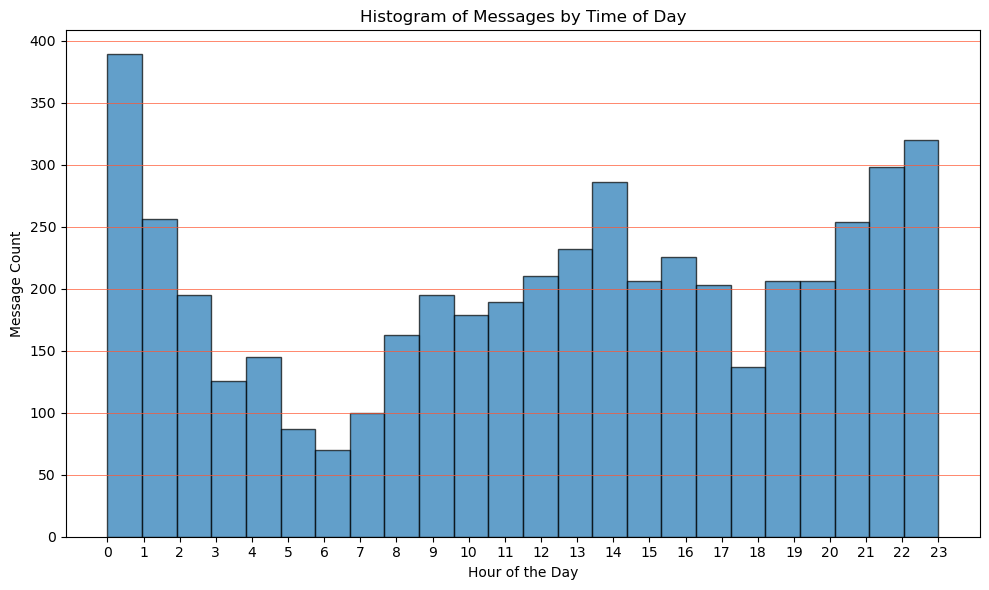

In [26]:
df['hour'] = df['time'].dt.hour

plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, color='#1f77b4', edgecolor='k', alpha=0.7)
plt.title('Histogram of Messages by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.xticks(range(24))
plt.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='#FF5733')  # Add grid between bars
plt.tight_layout()  # Adjusts the layout to prevent labels from being clipped
plt.show()

### We can conclude from the graphic that messages are mostly received at nighttime.

## Word Cloud

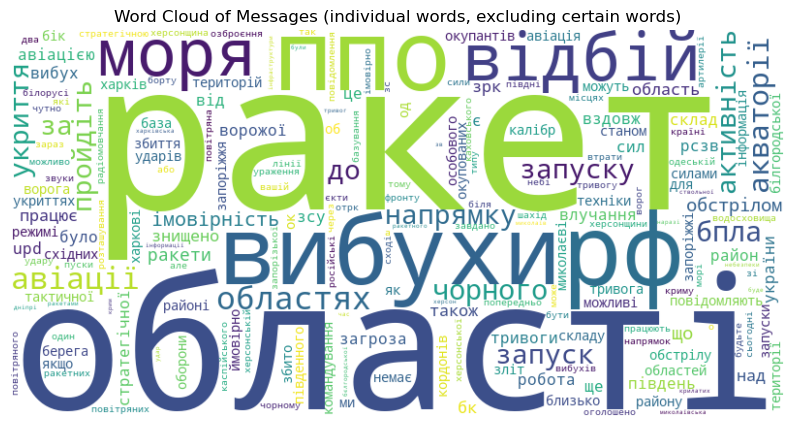

In [15]:
text = ' '.join(df['message'].astype(str))

words_to_drop = ['у', 'на', 'в', 'із', 'з', 'та', 'і', 'по', 'не', 'про', 'під']  # Add words you want to drop here

words = re.findall(r'\b[^\W\d_]+\b', text)  # Extract words containing only letters

words = [word for word in words if word.lower() not in words_to_drop]

cleaned_text = ' '.join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(cleaned_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Messages (individual words, excluding certain words)')
plt.axis('off')
plt.show()

### After discovering the number of messages in general, let's take a closer look at the particular keywords in those news.

## Top 10 Most Common Words Bar Chart

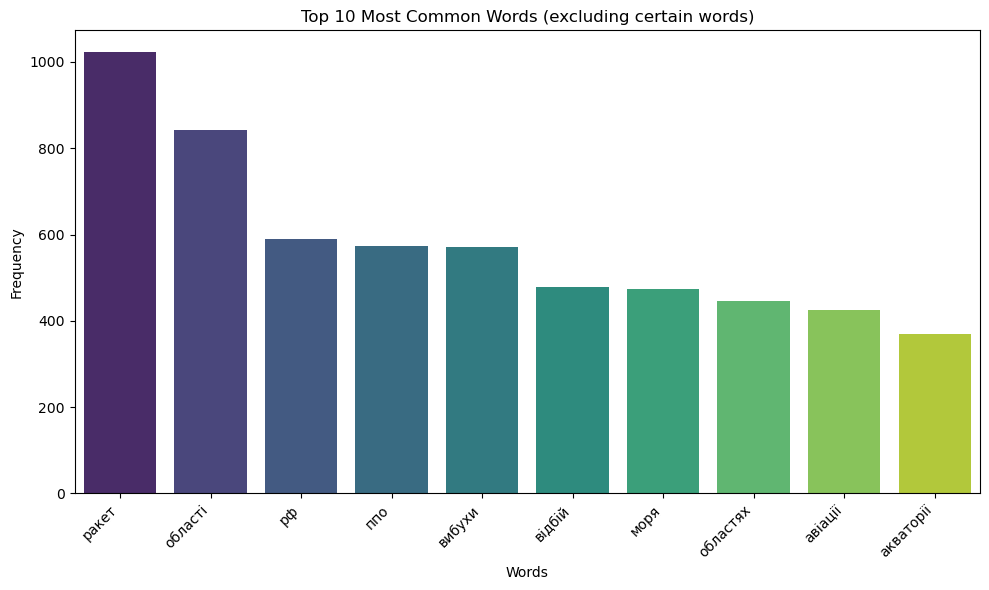

In [16]:
word_counts = Counter(words)

top_n = 10  
top_words, frequencies = zip(*word_counts.most_common(top_n))

data = pd.DataFrame({'Word': top_words, 'Frequency': frequencies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=data, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words (excluding certain words)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Heatmap of Words Correlation

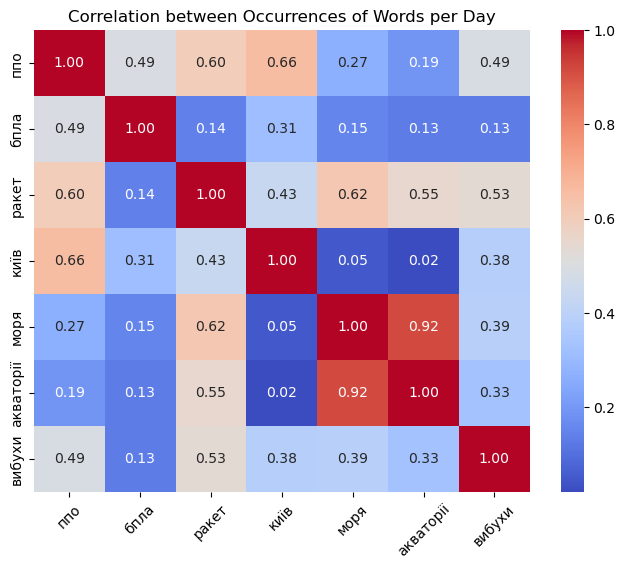

In [17]:
words = ['ппо', 'бпла', 'ракет', 'київ', 'моря', 'акваторії', 'вибухи']

for word in words:
    df[word+'_count'] = df['message'].str.count(word)

daily_counts = df.groupby(df['date'].dt.date)[[word+'_count' for word in words]].sum()

correlation_matrix = daily_counts.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=words, yticklabels=words)
plt.title('Correlation between Occurrences of Words per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### The correlation coefficient measures the strength and direction of the linear relationship between the occurrences of two words

## Plot of Word Frequency

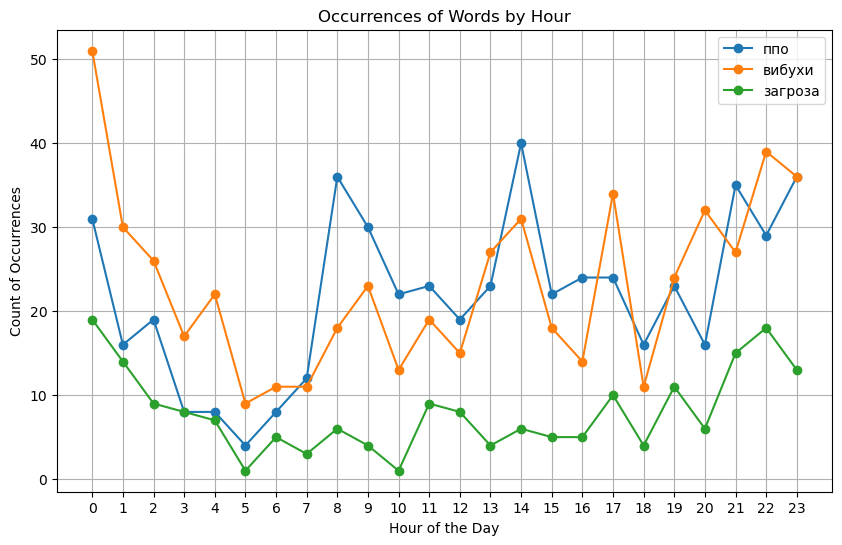

In [18]:
words_to_analyze = ['ппо', 'вибухи', 'загроза']

word_occurrences = df[df['message'].str.contains('|'.join(words_to_analyze), na=False)]

hourly_counts = word_occurrences.groupby([word_occurrences['time'].dt.hour, word_occurrences['message'].str.extract(f"({'|'.join(words_to_analyze)})")[0]])['time'].count().unstack().fillna(0)

plt.figure(figsize=(10, 6))
for word in words_to_analyze:
    hourly_counts[word].plot(kind='line', marker='o', label=word)

plt.xlabel('Hour of the Day')
plt.ylabel('Count of Occurrences')
plt.title('Occurrences of Words by Hour')
plt.legend()
plt.xticks(range(24))
plt.grid(True)
plt.show()


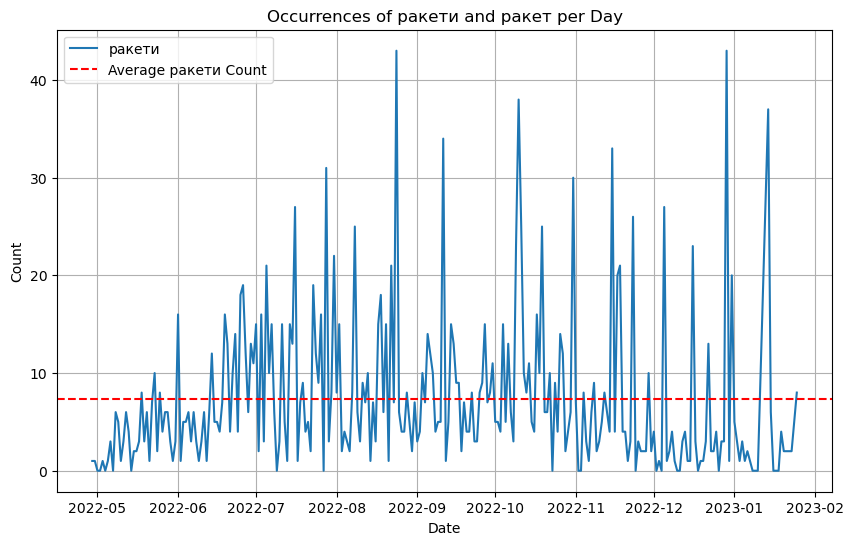

In [19]:
word1 = 'ракети'
word2 = 'ракет'

df['word1_count'] = df['message'].str.count(word1)
df['word2_count'] = df['message'].str.count(word2)

daily_count = df.groupby(df['date'].dt.date)[['word1_count', 'word2_count']].sum()
daily_counts = daily_count['word1_count']+daily_count['word2_count']

average_counts = daily_counts.mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts, label=word1)
plt.axhline(y=average_counts, color='r', linestyle='--', label=f'Average {word1} Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'Occurrences of {word1} and {word2} per Day')
plt.legend()
plt.grid(True)
plt.show()